In [1]:
#问题描述:

#考虑一个非常简单的 RNN 单元，其隐藏状态 (h_t) 按如下方式更新：
#[ h_t = \tanh(x_t W_{xh}^T + h_{t-1} W_{hh}^T + b_h) ]
#为了简化计算，我们假设偏置 (b_h = 0)。
#[ h_t = \tanh(x_t W_{xh}^T + h_{t-1} W_{hh}^T) ]

#网络和输入规格:

#输入维度 (D_x): 2
#隐藏状态维度 (D_h): 3
#时间步数: 我们只考虑两个时间步, t=0 和 t=1。

#任务:

#前向传播 (展开时间步):
#  a. 使用 (x_0) 和 (h_{-1}) 计算第一个时间步的隐藏层输入 (z_0 = x_0 W_{xh}^T + h_{-1} W_{hh}^T)。
#  b. 计算第一个时间步的隐藏状态 (h_0 = \tanh(z_0))。
#  c. 使用 (x_1) 和 (h_0) 计算第二个时间步的隐藏层输入 (z_1 = x_1 W_{xh}^T + h_{0} W_{hh}^T)。
#  d. 计算第二个时间步的隐藏状态 (h_1 = \tanh(z_1))。 (这是我们关心的最终状态)

#损失计算: a. 使用计算得到的 (h_1) 和给定的 (h_{target}) 计算损失 (L)。(这是一个标量)
#反向传播 (梯度计算):
#使用 PyTorch 的 自动微分 (loss.backward()) 计算损失 ( L ) 相对于参数 (W_{xh}) 和 (W_{hh}) 的梯度。

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [55]:
#前向传播
def forward(W_xh, W_hh, x_0, x_1):
  z_0 = torch.matmul(x_0, W_xh.T) #shape (1,3)
  h_0 = torch.tanh(z_0)

  z_1 = torch.matmul(x_1, W_xh.T) + torch.matmul(h_0, W_hh.t()) #shape (1,3)
  h_1 = torch.tanh(z_1)
  return h_1

In [36]:
#计算损失函数loss
def compute_loss(h_1, h_target):
  loss = (h_1 - h_target)**2 /2
  return loss

epoch: 1 loss: 0.3752 h_1: tensor([[ 0.1091, -0.0007, -0.0902]], grad_fn=<TanhBackward0>)


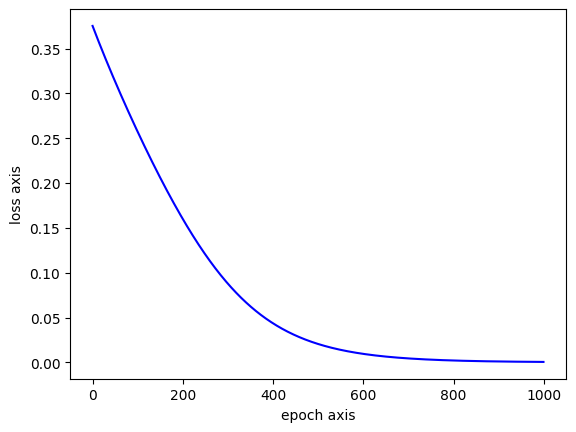

In [59]:
# 设置参数和输入
W_xh = torch.tensor([
    [0.1, 0.2],
    [-0.3, 0.4],
    [0.2, -0.1]],requires_grad=True)  # 形状 3x2

W_hh = torch.tensor([
    [0.5, -0.1, 0.1],
    [0.1, 0.3, -0.2],
    [-0.2, 0.4, 0.1]],requires_grad=True)  # 形状 3x3

x_0 = torch.tensor([[0.5, -0.2]])  # 形状 1x2
x_1 = torch.tensor([[0.1, 0.3]])  # 形状 1x2
h_target = torch.tensor([[0.5, -0.5, 0.5]])  # 形状 1x3

epochs = 1000
losses = []

learning_rate = 0.01

for epoch in range(epochs):
  h_1 = forward(W_xh, W_hh, x_0, x_1)

  loss = compute_loss(h_1, h_target).mean()
  losses.append(loss.item())

  if W_xh.grad is not None:
    W_xh.grad.zero_()
    W_hh.grad.zero_()

  loss.backward()

  with torch.no_grad():
    W_xh -= learning_rate * W_xh.grad
    W_hh -= learning_rate * W_hh.grad

  if epoch%1000 == 0:
    print(f"epoch: {epoch + 1}",
      f"loss: {loss.item():.4f}",
      f"h_1: {h_1}")

plt.plot(range(epochs), losses, "blue")
plt.xlabel("epoch axis")
plt.ylabel("loss axis")
plt.show()